# Perturbation-Based Techniques

These methods explain how a model reacts when you slightly change (perturb) its input. Think: “What happens if I sneakily change one pixel or word?”

## SHAP (SHapley Additive exPlanations) 

**Idea**: This method uses game‑theory to assign each feature (pixel, word, etc.) a fair “value” for its contribution to the final prediction.

In [32]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------------------------------------- 544.4/544.4 kB 17.6 MB/s  0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



In [1]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [2]:
# Build a synthetic dataset
X, y = make_classification(n_samples=100, n_features=5, 
                           n_informative=3, n_redundant=0,
                           random_state=42)
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names)

In [3]:
X_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4
0,0.051448,-0.159939,-1.169208,0.857660,-0.016442
1,2.689843,0.543360,3.535807,-1.669405,-1.562098
2,-2.470768,-0.506943,-0.794097,0.244967,1.074383
3,1.620937,-1.211016,0.699470,-0.066080,0.166733
4,-1.456762,-0.220970,0.198916,-0.112328,-0.766340


In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

In [5]:
# Fit a classifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [6]:
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

A summary plot showing the impact of each feature on model output:

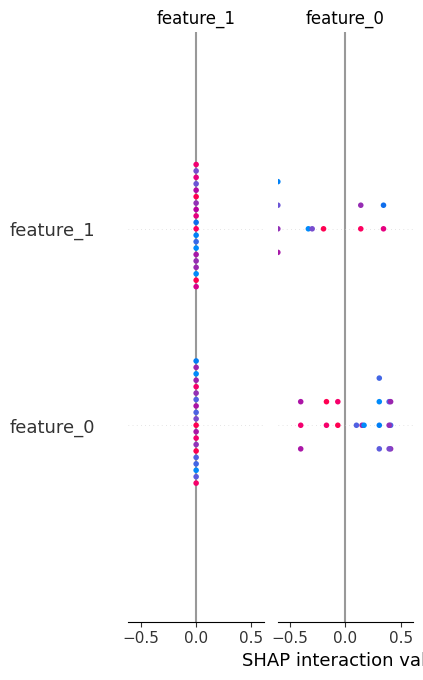

In [7]:
# Visualize
shap.summary_plot(shap_values, X_test, feature_names=feature_names)